# Clustering y clasificación.
Resumen:
+ Clustering jerárquico
+ Representación gráfica de un dendograma
+ Truncamiento de un dendograma
+ Corte automático de un dendograma

## Clustering jerárquico
Antes de empezar, pongamos un poco de notación para hablar todos el mismo idioma

+ **X** dataset (array de n x m) de puntos a clusterizar
+ **n** número de datos
+ **m** número de rasgos
+ **Z** array de enlace del cluster con la información de las uniones
+ **k** número de clusters

In [1]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

%matplotlib inline

Vamos a empezar por generar datos aleatorios (puede hacerse con cualquier dataset, evidentemente). Vamos a generar dos clusters. El cluster A tendrá 100 puntos y el B tendrá 50 puntos.

(150, 2)


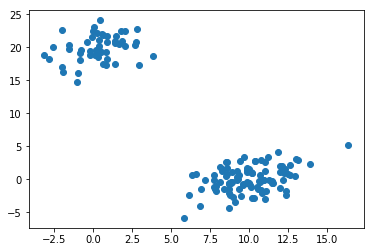

In [2]:
np.random.seed(4711)
a = np.random.multivariate_normal([10,0],[[3,1],[1,4]], size = [100,])
b = np.random.multivariate_normal([0,20], [[3,1],[1,4]], size = [50,])
X = np.concatenate((a,b))
print(X.shape)
plt.scatter(X[:,0], X[:,1])

Vamos a realizar un clustering jerárquico para realizar los cálculos. Primero generamos la matriz de enlace.

In [3]:
Z = linkage(X, "ward")

In [4]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [5]:
c, coph_dist = cophenet(Z, pdist(X))
c

0.9800148387574268

In [6]:
Z[0]

array([5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00])

Esto se interpreta de la siguiente forma: los puntos de datos 52 y 53 son los más cercanos, con una distancia de 0,0415 y ha generado un cluster de 2 elementos.

In [7]:
Z[1]

array([1.40000000e+01, 7.90000000e+01, 5.91375926e-02, 2.00000000e+00])

El siguiente que ha unido son los puntos 14 y 79, con una distancia de 0,05913 y ha creado un cluster de 2 elementos.

In [8]:
Z[:20]

array([[5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00],
       [1.40000000e+01, 7.90000000e+01, 5.91375926e-02, 2.00000000e+00],
       [3.30000000e+01, 6.80000000e+01, 7.10677929e-02, 2.00000000e+00],
       [1.70000000e+01, 7.30000000e+01, 7.13712071e-02, 2.00000000e+00],
       [1.00000000e+00, 8.00000000e+00, 7.54313099e-02, 2.00000000e+00],
       [8.50000000e+01, 9.50000000e+01, 1.09277896e-01, 2.00000000e+00],
       [1.08000000e+02, 1.31000000e+02, 1.10071548e-01, 2.00000000e+00],
       [9.00000000e+00, 6.60000000e+01, 1.13022407e-01, 2.00000000e+00],
       [1.50000000e+01, 6.90000000e+01, 1.14289714e-01, 2.00000000e+00],
       [6.30000000e+01, 9.80000000e+01, 1.21200766e-01, 2.00000000e+00],
       [1.07000000e+02, 1.15000000e+02, 1.21671017e-01, 2.00000000e+00],
       [6.50000000e+01, 7.40000000e+01, 1.24900190e-01, 2.00000000e+00],
       [5.80000000e+01, 6.10000000e+01, 1.40277358e-01, 2.00000000e+00],
       [6.20000000e+01, 1.52000000e+02, 1.72599535e

Vemos que se han generado clusters de 3 elementos: la posición 62 y la 152. El array tenía inicialmente una longitud de 150 elementos (0 a 149). A partir de ahí el array crece con los clusters generados por el algoritmo.

In [9]:
print(Z[152-len(X)])  # cluster 152
print(Z[158-len(X)])  #cluster 158

[33.         68.          0.07106779  2.        ]
[15.         69.          0.11428971  2.        ]


Por ejemplo, el cluster 152 es la posición 33 y la 68, con una distancia de 0.071 y dos elementos.
El cluster 158 son la posición 15 y la 69, con una distancia 0.1142 y dos elementos.

In [10]:
X[[33,62,68]]

array([[ 9.83913054, -0.48729797],
       [ 9.97792822, -0.56383202],
       [ 9.8934927 , -0.44152257]])

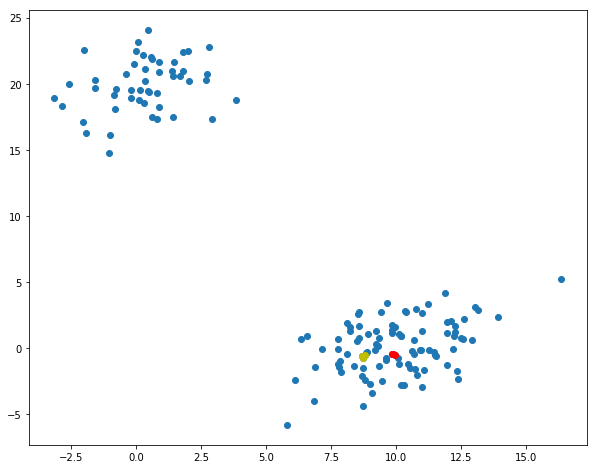

In [11]:
idx = [33,62,68]
idx2 = [15,69,41]
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1])  #pintar todos los puntos
plt.scatter(X[idx,0], X[idx,1], c='r')  #destacamos en rojo los puntos interesantes
plt.scatter(X[idx2,0], X[idx2,1], c='y')  #destacamos en amarillo el segundo cluster

## Representación gráfica de un dendrograma

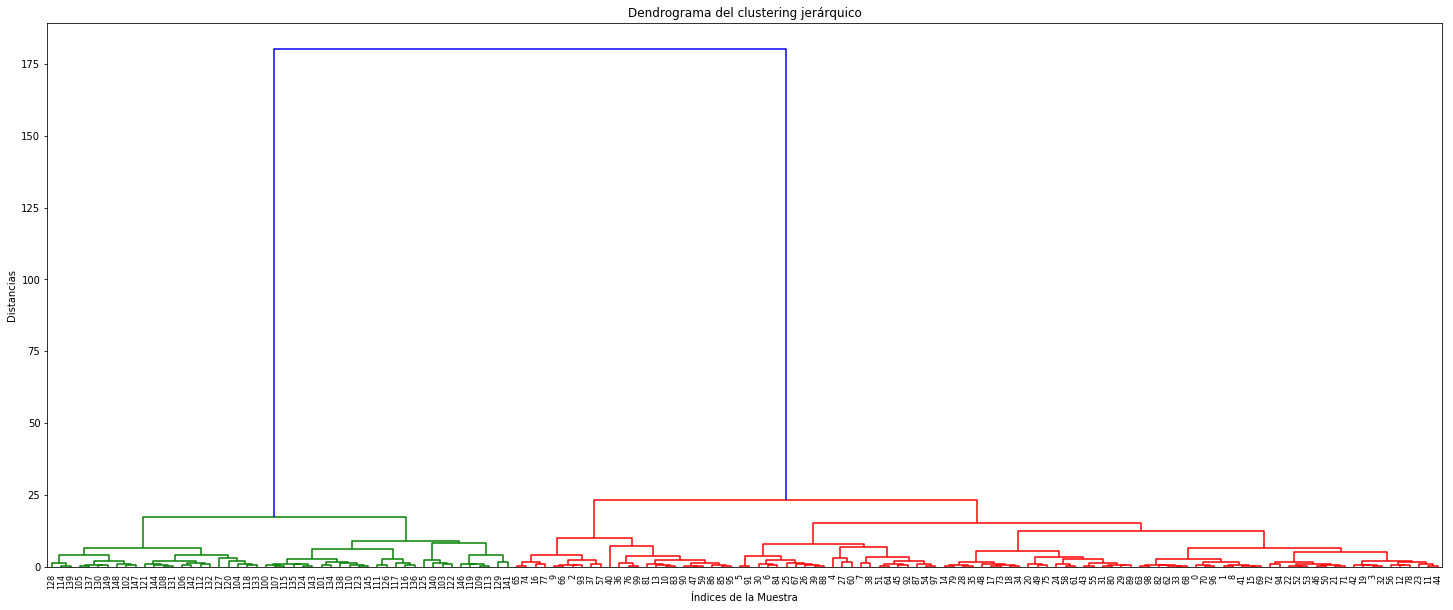

In [13]:
plt.figure(figsize=(25,10))
plt.title("Dendrograma del clustering jerárquico")
plt.xlabel("Índices de la Muestra")
plt.ylabel("Distancias")
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.0, color_threshold=0.7*180)
plt.show()

In [18]:
# Vamos a mostrar los últimos cuatro cluster empezando por la cola
Z[-4:]

array([[290.        , 294.        ,  15.11533118,  76.        ],
       [287.        , 292.        ,  17.11527362,  50.        ],
       [293.        , 295.        ,  23.12198936, 100.        ],
       [296.        , 297.        , 180.27043021, 150.        ]])

El cuarto por la cola se une a distancia 15, el siguiente a distancia 17, el penúltimo se une a distancia 23 y el último a distancia 180, uniendo los 150 elementos que componen el dataset. Estas distancias nos dicen que cuando algo se uno para formar un cluster tal vez no debería ser unido, ya que tal vez sean elementos tan alejados que es normal que forman parte de clusters diferentes.

Por ejemplo, el último cluster une 150 elementos a una distancia de 180. Tal vez no deberían ser unidos en un único cluster. Visualizando el dendograma tener dos clusters (el verde con 50 elementos y el rojo con 100 elementos) para una buena segmentación o división. Parece que nuestro dataset está dividido en dos grandes grupos.

El parámetro `color_threshold` nos permite definir el umbral a partir del cual los cluster se pintan de colores diferentes. Si no se especifica el umbral es del 70% de los valores.

En un escenario donde haya un volumen alto de datos, con tantas divisiones y subdivisiones puede resultar difícil sacar algo en claro del dendograma. ¿Existe alguna forma de hacer esta representación más sencilla? La respuesta es el truncamiento de dendogramas.

### Truncar el dendrograma

Vamos a especificar una versión reducida del dendograma:

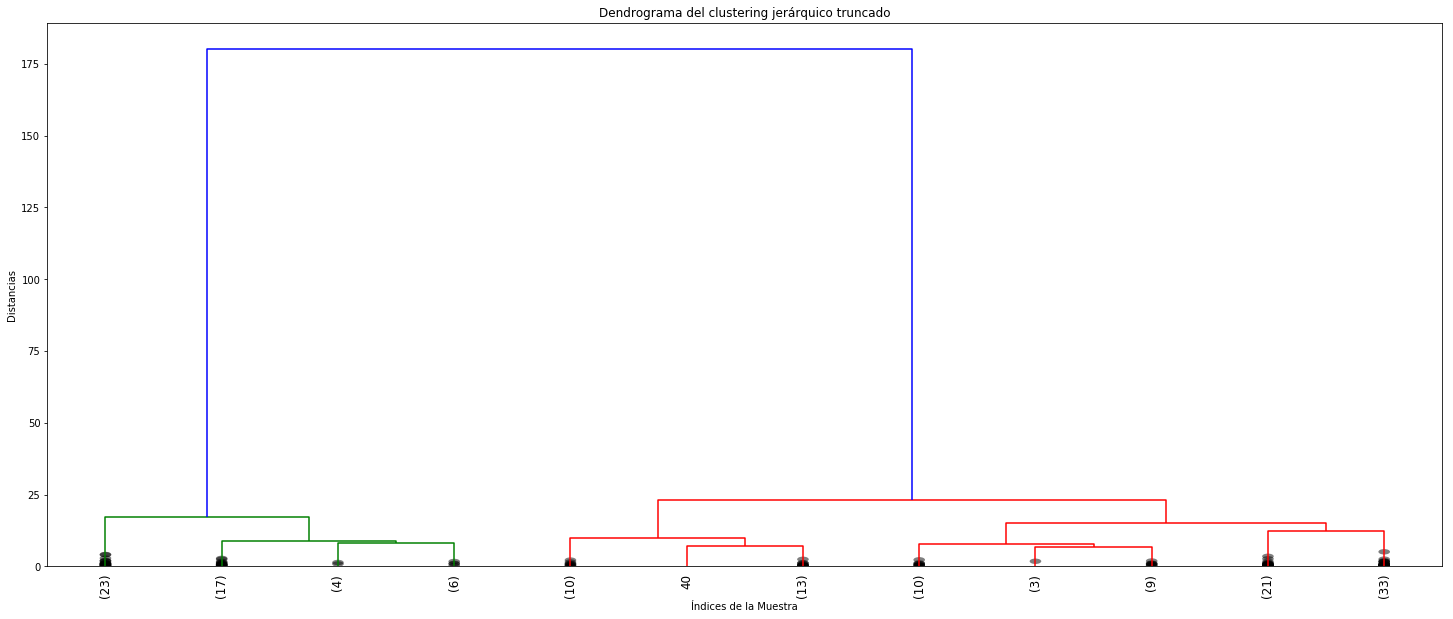

In [20]:
plt.figure(figsize=(25,10))
plt.title("Dendrograma del clustering jerárquico truncado")
plt.xlabel("Índices de la Muestra")
plt.ylabel("Distancias")
dendrogram(Z, leaf_rotation=90., leaf_font_size=12.0, color_threshold=0.7*180,
           truncate_mode="lastp", p=12, show_leaf_counts=True, show_contracted=True,)  # p nos muestra los ultimos n clusters
plt.show()

También podemos crearnos una función para *tunear* el dendograma. Por ejemplo, para cada una de las líneas horizontales, donde se unen, mostrar un pequeño punto indicando la altura de unión.

### Dendrograma tuneado

In [51]:
def dendrogram_tune(*args, **kwargs):
    
    max_d=kwargs.pop("max_d", None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)
    
    ddata = dendrogram(*args,**kwargs)
    
    if not kwargs.get('no_plot', False):
        plt.title("Clustering jerárquico con Dendrograma truncado")
        plt.xlabel("Índice del Dataset (o tamaño del cluster)")
        plt.ylabel("Distancia")
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y>annotate_above:
                plt.plot(x,y,'o',c=c)
                plt.annotate('%.3g'%y, (x,y), xytext=(0,-5),
                            textcoords="offset points", va="top", ha="center")
                
    if max_d:
        plt.axhline(y=max_d, c='k')
        
    return ddata

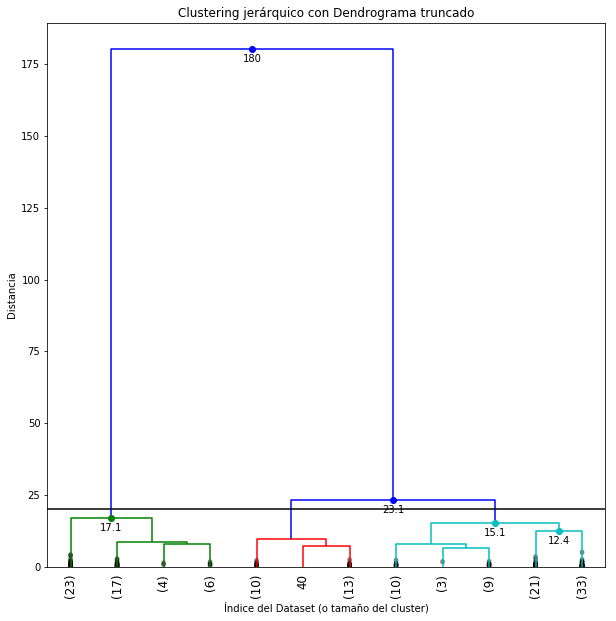

In [55]:
plt.figure(figsize=(10,10))
dendrogram_tune(Z,truncate_mode='lastp',p=12, leaf_rotation=90., leaf_font_size=12.,
                show_contracted=True,annotate_above=10, max_d=20)
plt.show()

## Corte automático del dendrograma

Para decidir de manera no supervisada cuántos clusters deben generarse, cuál sería el número de clusters óptimo no hay una regla de oro para determinar el número de clusters ideal para cualquier caso.

En esta entreda de [Wikipedia](https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set) se muestran diversos métodos para determina el número de clusters en un dataset.

Cuando se trata de un clustering jerárquico o un dendograma, existe un método llamado de la Inconsistencia, que es uno de los que utiliza internamente Python a la hora de decidir el corte. La pregunta que nos llega al método de la incosistencia es ¿qué es lo que hace que una distancia de un cluster a otro sea cualitativamente relevante para formar un cluster? La respuesta es que podríamos comparar cada altura a la que se juntan los clusters (llamémosla `h`) con la altura promedio y normalicemos la desviación estándar de todas y cada una de las profundidades de unión respecto a niveles previos.

`inconsistency_i = (h_i - avg(h_j)) / std(h_j)`

In [40]:
from scipy.cluster.hierarchy import inconsistent

depth = 5
incons = inconsistent(Z, depth)
incons[-10:]

array([[ 1.80874989,  2.17061644, 10.        ,  2.44276733],
       [ 2.31731998,  2.19649179, 16.        ,  2.52742372],
       [ 2.24511599,  2.44225327,  9.        ,  2.37659088],
       [ 2.30462321,  2.44191287, 21.        ,  2.6387508 ],
       [ 2.20673283,  2.68378067, 17.        ,  2.84581581],
       [ 1.95309037,  2.58100378, 29.        ,  4.05821033],
       [ 3.46173275,  3.53735716, 28.        ,  3.29443647],
       [ 3.15857131,  3.54836284, 28.        ,  3.93327935],
       [ 4.90210137,  5.10301603, 28.        ,  3.57041559],
       [12.12200256, 32.15467931, 30.        ,  5.22936105]])

La matriz nos devuelve en la primera columna la media, seguida de la desvización estándar, el número de elementos y, por último, el factor de incosistencia.

Viendo las 10 últimas filas estaríamos tentados a decir que el mayor salto es el 5 de la última fila y determinado que el factor de inconsistencia es 5. Es decir, cualquier salto cuyo factor de inconsistencia supere a 5 será un salto lo suficientemente grande.

Pero fijemos una profundidad de 3.

In [42]:
depth = 3
incons = inconsistent(Z, depth)
incons[-10:]

array([[ 3.63777835,  2.5556114 ,  4.        ,  1.35908084],
       [ 3.89767268,  2.57216151,  7.        ,  1.54388156],
       [ 3.05885714,  2.66707272,  6.        ,  1.87115096],
       [ 4.92746418,  2.73259589,  7.        ,  1.39821573],
       [ 4.76943311,  3.16276553,  6.        ,  1.60455941],
       [ 5.27287862,  3.56604844,  7.        ,  2.00627335],
       [ 8.22057081,  4.07583053,  7.        ,  1.69162096],
       [ 7.83287032,  4.46681266,  7.        ,  2.07808207],
       [11.38091435,  6.29430022,  7.        ,  1.86535033],
       [37.25844589, 63.31539362,  7.        ,  2.25872377]])

Ahora el factor de incosistencia ha variado sustancialmente. Vemos entonces que los valores de inconsistencia son muy dependientes de la profundidad del árbol sobre el que hemos calculado el promedio y la desviación típica. Por tanto, no podemos tomar a la ligera el valor. Por ello existen otras técnicas:

### Método del codo

En esencia, este método intenta buscar el paso del clustering donde la aceleración del crecimiento de la distancia es mayor. Es decir, el mayor codo que se puede generar cuando se dibuja la línea de los incrementos de las distancias de un cluster a otro.

[180.27043021  23.12198936  17.11527362  15.11533118  12.42734657
   9.84427829   8.74822275   8.04935282   7.86878542   7.11106083]


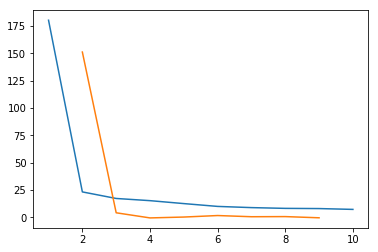

El número óptimo de cluster es 2


In [46]:
last = Z[-10:,2]       # Nos quedamos con los últimos 10 clusters
last_rev = last[::-1]  # Nos quedamos sólo con las distancias, la última columna
print(last_rev)
idx = np.arange(1, len(last)+1)
plt.plot(idx, last_rev)

acc = np.diff(last, 2)  # calculamos las diferencias entre las distancias entre pares
acc_rev = acc[::-1]
plt.plot(idx[:-2]+1, acc_rev)
plt.show()
k = acc_rev.argmax() + 2
print("El número óptimo de cluster es %s" %str(k))

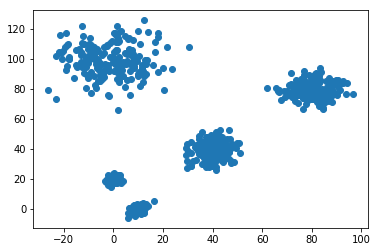

In [47]:
c = np.random.multivariate_normal([40,40],[[20,1],[1,30]], size=[200,])
d = np.random.multivariate_normal([80,80],[[30,1],[1,30]], size=[200,])
e = np.random.multivariate_normal([0,100],[[100,1],[1,100]], size=[200,])
X2 = np.concatenate((X,c,d,e),)
plt.scatter(X2[:,0], X2[:,1])
plt.show()

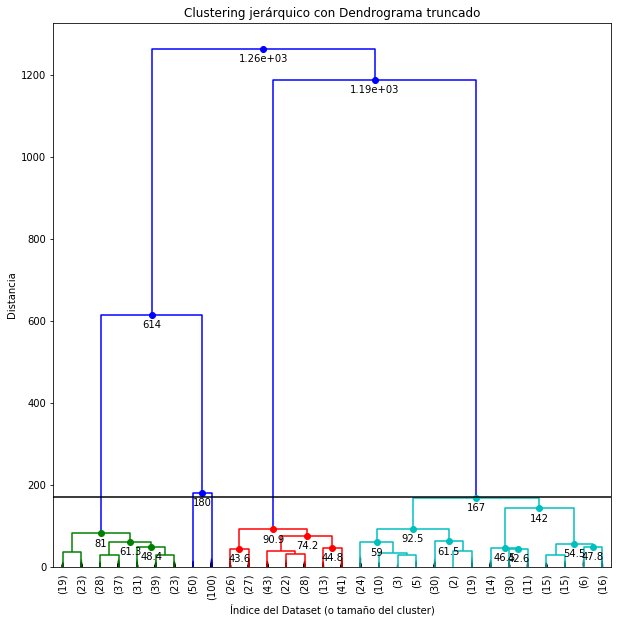

In [48]:
Z2 = linkage(X2,"ward")

plt.figure(figsize=(10,10))
dendrogram_tune(
    Z2,
    truncate_mode="lastp",
    p=30,
    leaf_rotation=90.,
    leaf_font_size=10.,
    show_contracted=True,
    annotate_above = 40,
    max_d = 170
)

plt.show()

[1262.52130994 1186.7588235   614.06504667  180.27043021  166.66434658
  141.92437181   92.54599212   90.91214341   80.96733501   74.17015312]


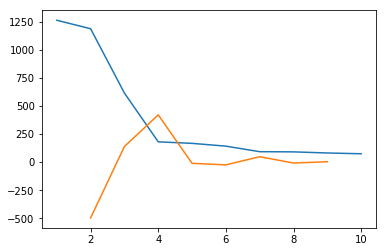

El número óptimo de cluster es 4


In [56]:
last = Z2[-10:,2]
last_rev = last[::-1]
print(last_rev)
idx = np.arange(1, len(last)+1)
plt.plot(idx, last_rev)

acc = np.diff(last,2)
acc_rev = acc[::-1]
plt.plot(idx[:-2]+1, acc_rev)
plt.show()
k = acc_rev.argmax() +2
print("El número óptimo de cluster es %s"%str(k))

In [57]:
print(inconsistent(Z2, 5)[-10:])

[[ 13.99221995  15.56655759  30.           3.8658472 ]
 [ 16.73940735  18.56390061  30.           3.45982932]
 [ 19.05945013  20.53210626  31.           3.49952861]
 [ 19.25573887  20.8265769   29.           3.51907342]
 [ 21.36116189  26.77659523  30.           4.50255938]
 [ 36.58100874  37.08602393  31.           3.50761079]
 [ 12.12200256  32.15467931  30.           5.22936105]
 [ 42.61369802 111.38576865  31.           5.13038026]
 [ 81.75198678 208.31582073  31.           5.30447871]
 [147.25602023 307.95700562  31.           3.62149673]]
